<a href="https://colab.research.google.com/github/CSharpFiasco/ArrayList/blob/master/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#stock market
description : this program is an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the last 10 years stock price

In [ ]:
#import library
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
print("all library imported successfully")

all library imported successfully


In [ ]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2019-12-17')
df
#df.head()
#df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


In [ ]:
df.shape

(2003, 6)

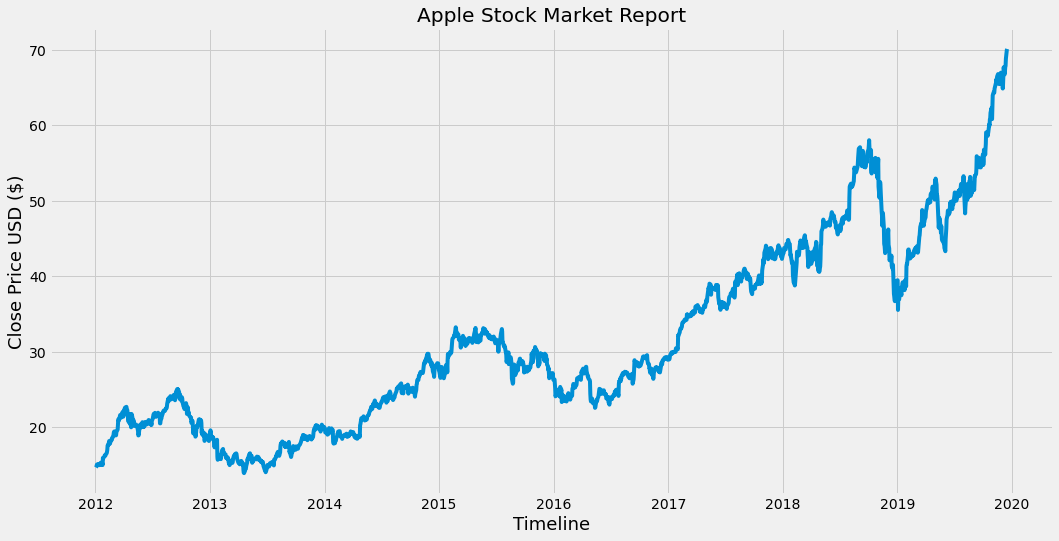

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Apple Stock Market Report")
plt.plot(df['Close'])      #this close is close price of column 5 of the data we can change to high also
plt.xlabel ('Timeline', fontsize = 18)
plt.ylabel ('Close Price USD ($)', fontsize = 18)
plt.show()


In [ ]:
#create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get teh number of row to train the model one
training_data_len = math.ceil(len(dataset)* 0.8) #math.ceil to round up teh data and 0.8 will give 80% of value
training_data_len

1603

In [ ]:
#Scale the data, its always good practice to preprossing of normalization of data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :] #[start: end: all the column:]
#split the data into x_train and y_train data set
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(1543, 60)
(1543,)


In [ ]:
# as we see the data is in two D assay but LSTM model need in 3 D so we need to reshape
#Reshape the data why we need it because LSTM model need 
#x_train = np.reshape(x_train, (2075, 60, 1)) # number of row (sampel), number of colum (time) and 1 is closeing data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1543, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 34s 22ms/step - loss: 9.5096e-04


In [ ]:
#creating a testing data set
#create a new array containing scaled value from index 1543 to 200
test_data = scaled_data[training_data_len -60: , :]
x_test = []
y_test = dataset[training_data_len, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert data to numpy array
x_test = np.array(x_test)


In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the model prediction
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
#evaluvate the model
#RMSE is the root mean square error is the best way to check 
RMSE = np.sqrt(np.mean(prediction -y_test)**2)
RMSE


2.8303097248077393

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


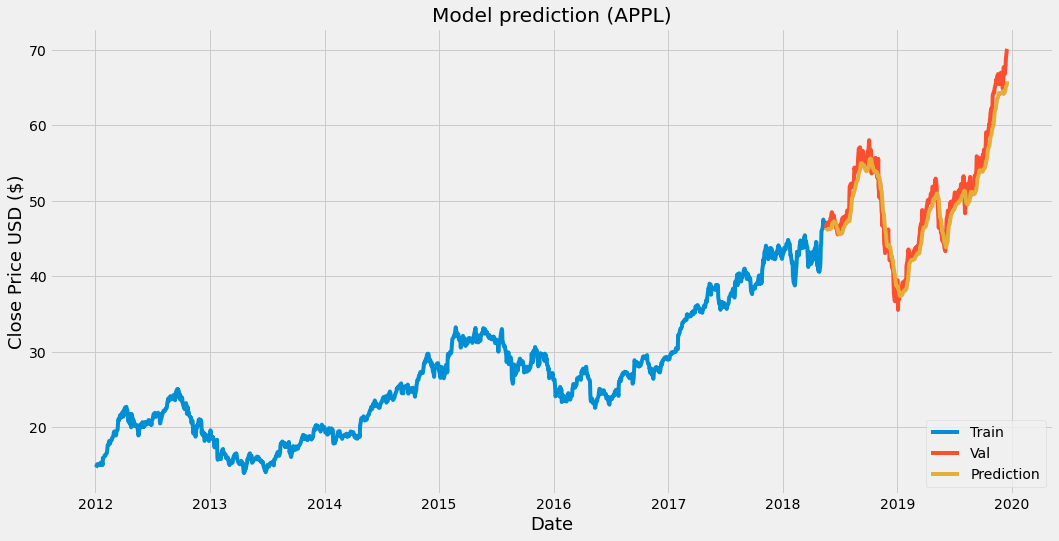

In [ ]:
#plot the data
train = data[0:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction
#visulaize the data
plt.figure(figsize=(16, 8))
plt.title("Model prediction (APPL)")

plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close']) 
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted prices
valid

,Close,Prediction
Date,,
2018-05-17,46.747501,46.081875
2018-05-18,46.577499,46.159054
2018-05-21,46.907501,46.169960
2018-05-22,46.790001,46.182846
2018-05-23,47.090000,46.180939
...,...,...
2019-12-11,67.692497,64.631660
2019-12-12,67.864998,64.841270
2019-12-13,68.787498,65.068260


In [ ]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert to the dataframe to the array
last_60_days = new_df[-60:].values
#Scale the data to be value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
#conver data to numpy array
x_test = np.array(x_test)
#reshpe the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[66.28756]]


In [ ]:
#get the quote
apple_quote_2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-17', end = '2019-12-17')
print(apple_quote_2['Close'])

Date
2019-12-17    70.102501
Name: Close, dtype: float64
